In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
import seaborn as sns

# Problem 1: Gaussian Distribution and Sample Size
Using the scipy library [documentation](https://docs.scipy.org/doc/scipy/index.html) as a reference, sample from the Gaussian (Normal) distribution at a depth of 10, 50, 200, and 1000. (Hint: check the Wednesday Continuous Distribution notebook for an example)

For each sample depth, run three trials. Plot a histogram of each trial in different colors on the same graph.

Finally, overlay the probability density function for the Gaussian distribution.

Further questions:
- If you adjust the histogram bin size what happens?
- Qualitatively, what is a sufficient sample size or depth to get an accurate picture of the distribution?
- What problems are there with increasing sample size over the minimum?

In [ ]:
"Array based sampling"
n_trials = 3
depth = 100

# We can sample from any distribtion with arbitrary size using scipy (wihtout for loops!)

# This will sample 3 trials of 100 samples each from a normal distribution (with mean=0 and std=1 by default)
data = sps.norm.rvs(size=(depth, n_trials))
data[:5]

array([[-1.42486857, -0.17467596,  0.18391701],
       [ 0.5194188 , -0.49500524, -0.2675708 ],
       [-0.63658383, -0.93803091, -1.00496295],
       [-0.81576279, -0.72133553,  0.3226978 ],
       [ 1.06076077,  0.06633674,  0.35069836]])

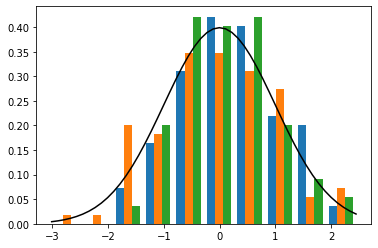

In [ ]:
"Plot the distribution"
# Histogram of all trials (we can pass our 1000 x 3 matrix and matplotlib will plot the histogram for all 3 trials)
plt.hist(data, density=True)
# True distribution (from smallest to largest point)
x = np.linspace(data.min(), data.max())
pdf = sps.norm.pdf(x)
plt.plot(x, pdf, color='k')
plt.show()

blue | Mean= -0.05  Std Dev= 1.14
green | Mean= 0.2  Std Dev= 0.99
red | Mean= 0.21  Std Dev= 1.39


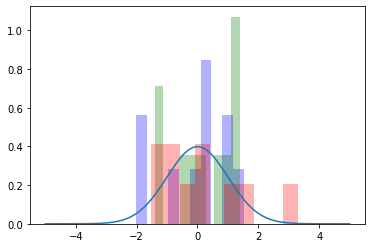

In [ ]:
sampleDepth = 10
colors = ['blue', 'green', 'red']

for color in colors:
  data = sps.norm.rvs(size = sampleDepth)
  print(color, '| Mean=', round(data.mean(), 2), ' Std Dev=', round(data.std(), 2))
  plt.hist(data, density=True, color=color, alpha=0.3)

x = np.linspace(-5, 5, 1000)
y = sps.norm.pdf(x)
plt.plot(x, y)
plt.show()

blue | Mean= -0.09  Std Dev= 0.91
green | Mean= 0.03  Std Dev= 0.77
red | Mean= -0.04  Std Dev= 0.88


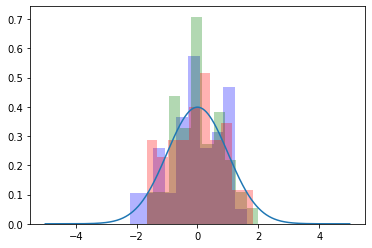

In [ ]:
sampleDepth = 50
colors = ['blue', 'green', 'red']

for color in colors:
  data = sps.norm.rvs(size = sampleDepth)
  print(color, '| Mean=', round(data.mean(), 2), ' Std Dev=', round(data.std(), 2))
  plt.hist(data, density=True, color=color, alpha=0.3)

x = np.linspace(-5, 5, 1000)
y = sps.norm.pdf(x)
plt.plot(x, y)
plt.show()

blue | Mean= -0.08  Std Dev= 0.99
green | Mean= 0.03  Std Dev= 1.01
red | Mean= -0.05  Std Dev= 1.11


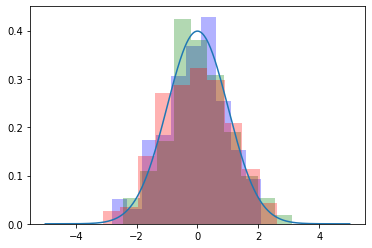

In [ ]:
sampleDepth = 200
colors = ['blue', 'green', 'red']

for color in colors:
  data = sps.norm.rvs(size = sampleDepth)
  print(color, '| Mean=', round(data.mean(), 2), ' Std Dev=', round(data.std(), 2))
  plt.hist(data, density=True, color=color, alpha=0.3)

x = np.linspace(-5, 5, 1000)
y = sps.norm.pdf(x)
plt.plot(x, y)
plt.show()

blue | Mean= -0.05  Std Dev= 0.93
green | Mean= 0.04  Std Dev= 1.01
red | Mean= -0.01  Std Dev= 1.01


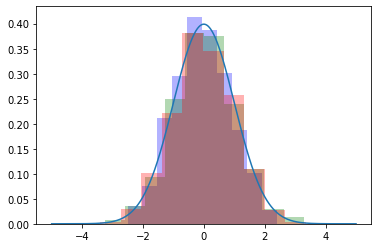

In [ ]:
sampleDepth = 1000
colors = ['blue', 'green', 'red']

for color in colors:
  data = sps.norm.rvs(size = sampleDepth)
  print(color, '| Mean=', round(data.mean(), 2), ' Std Dev=', round(data.std(), 2))
  plt.hist(data, density=True, color=color, alpha=0.3)

x = np.linspace(-5, 5, 1000)
y = sps.norm.pdf(x)
plt.plot(x, y)
plt.show()

## Generalizing effect of increased trial size (into to central limit theorem)

As we increase the trial size of a fixed sampling population, we can see how the mean and standard deviation converge around zero, the true mean, with decreased variance.

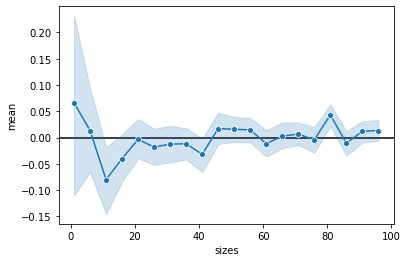

In [ ]:
"Vary trial size over large range"
# Trial sizes
sizes = np.arange(1, 100, 5)

# For each trial size, sample a populations of size 100, and take the mean
df = pd.DataFrame(np.array([np.random.normal(size=(100, s)).mean(1) for s in sizes]), index=sizes).rename_axis(columns='trials', index='sizes')

means = df.stack().reset_index(name='mean')

sns.lineplot(x='sizes', y='mean', data=means, marker='o')
plt.axhline(0, color='k', zorder=0)
plt.show()

# Bernoulli Trials
Definition of a Bernoulli Trial from [Wikipedia](https://en.wikipedia.org/wiki/Bernoulli_trial): A random experiment with exactly two possible outcomes, "success" and "failure".

For a random variable $X$

$X = 1$ with probability $p$

$X = 0$ with probability $q = 1 - p$.

## Examples
- A fair coin flip is where $p$ = $q$. The chances of success and failure are 50/50.

- In the case of whole genome sequencing the probability of a given sequencing read belonging to a specific gene (probability of success or $p$) is likely very low.


# Problem 2:
If $p$ is 0.3, how many successes would you expect to get if you did 100 Bernoulli trials?

Attempt to show this empirically by using scipy to sample 1000 Bernoulli trials and summing the result.

In [ ]:
from scipy.stats import bernoulli

p = 0.3
r = bernoulli.rvs(p, size=1000)
print(np.sum(r))
print(r)

285
[1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 

# Binomial distribution

[Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) describes the probability of $k$ successes in $n$ independent Bernoulli trials. The probability of success in each trial is $p$.

$$ B = \sum_{i=0}^{n}X_i $$ 

$$P(B = k) = p^k(1-p)^{n-k}\frac{n!}{k!(n-k)!}$$

Notice Pascal's Triangle from the homework!

## Examples:
- Pick a marble from a bag containing red and green marbles, then replacing that marble. Repeat this process $n$ times. Green marbles are successes and red marbles are failures.
- The number of reads that belong to a specific species out of all reads.


# Problem 3:
Complete the following code to create similar printed outputs and graphs.

In [ ]:
from scipy.stats import binom

# Sample from the binomial distribution
n = 20
p = 0.7
sampleDepth = 100
x = binom.rvs(n, p, size=sampleDepth) # sample from binomial distribution randomly
print(x.mean()) # what is the average value we would expect?
print(x)

14.11
[16 14 11 16 13 14 16 12 15 14 18 12 15 12 16 17 15 13 12 11 16 12 17 12
 16 13 12 14 15 12 13 15 16 11 11 17 14 15 16 13 15 11 17 16 14 13 17 16
 16 13 16 14 15 14 11 12  9 13 14 15 14 13 15 19 11 12 16 15 14 13 13 14
 15 11 13 12 13 14 13 17 14 13 11 15 14 16 15 12 15 15 16 18 16 14 12 17
 13 15 18 12]


Text(0.5, 1.0, 'Theory PDF')

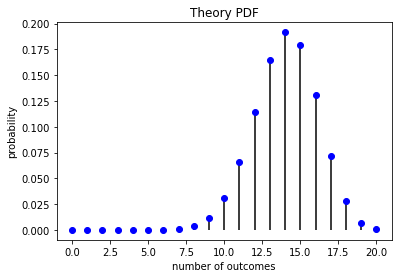

In [ ]:
# Plot the probability mass function for the distribution
n = 20
p = 0.7
k = np.arange(0,n+1) # need to give all possible number of successes
P = sps.binom.pmf(k, n, p) # probability mass function
plt.plot(k, P, 'bo')
plt.vlines(k, 0, P )
plt.xlabel('number of outcomes')
plt.ylabel('probability')
plt.title('Theory PDF')

Text(0.5, 1.0, 'PDF from 50 simulations')

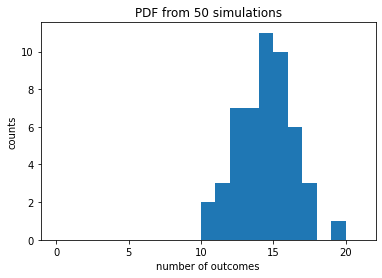

In [ ]:
# Plot a histogram of counts for low sample depth
sampleDepth = 50
x = sps.binom.rvs(n, p, size=sampleDepth)
plt.figure()
plt.hist(x, bins = np.hstack((k,n+1)));
h0, temp = np.histogram(x, bins=np.hstack((k,n+1)))
plt.xlabel('number of outcomes')
plt.ylabel('counts')
plt.title('PDF from {} simulations'.format(sampleDepth))


Text(0.5, 1.0, 'PDF from 10000 simulations')

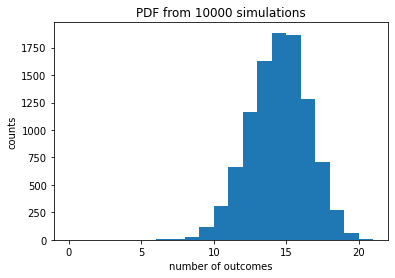

In [ ]:

# Do the same thing at high sample depth  
sampleDepth = 10**4
x = sps.binom.rvs(n, p, size=sampleDepth)
plt.figure()
plt.hist(x, bins = np.hstack((k,n+1)));
h1, temp = np.histogram(x, bins=np.hstack((k,n+1)))
plt.xlabel('number of outcomes')
plt.ylabel('counts')
plt.title('PDF from {} simulations'.format(sampleDepth))


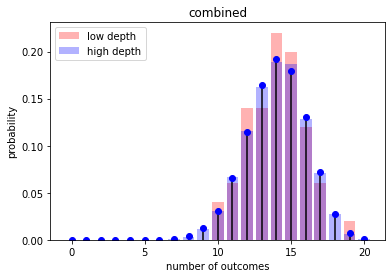

In [ ]:
# CHALLENGE: Turn the above count data for both high and low sample depth into
# probabilities and plot it on the same graph as the probability mass function 
plt.figure()
plt.plot(k, P, 'bo')
plt.vlines(k, 0, P )
h0 = h0/h0.sum() # convert low sample depth counts to probability
h1 = h1/h1.sum() # convert high sample depth counts to probability
plt.bar(k, h0, color='r', alpha=0.3, label='low depth');
plt.bar(k, h1, color='b', alpha=0.3, label='high depth');
plt.legend()
plt.xlabel('number of outcomes')
plt.ylabel('probability')
plt.title('combined');

# Poisson Distribution
The Poisson distribution approximates the Binomial distribution, if $p$ (probability of success) is small and $n$ (number of trials) is very large.

Binomial Distribution:
$$P(B = k) = p^k(1-p)^{n-k}\frac{n!}{k!(n-k)!}$$

Poisson Distribution:
$$P(X=k) = \frac{\lambda^k}{k!}e^{-\lambda}$$

$$\bar{X} = \lambda $$
$$\mathrm{Var}\{X\} = \lambda$$

Indeed, this is consistent with the limit of Binomial

$$\bar{X} = np = \lambda $$
$$\mathrm{Var}\{X\} = np(1-p) \approx np = \lambda$$

The number of reads from an OTU abundance is expected to have Poisson distribution.
The number of mutations per genome per generation is another example.

## Examples:
- From [Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution)
  - A call center receives an average of 180 calls per hour, 24 hours a day.
  - The calls are independent; receiving one does not change the probability of when the next one will arrive.
  - The number of calls received during any minute has a Poisson probability distribution with mean 3: the most likely numbers are 2 and 3 but 1 and 4 are also likely and there is a small probability of it being as low as zero and a very small probability it could be 10.
- The number of mutations per genome per generation is another example.
- The number of reads from an [OTU](https://www.metagenomics.wiki/pdf/taxonomy/16s/operational-taxonomic-unit-otu) abundance is expected to have Poisson distribution.

# Problem 4:
Remake [this](https://en.wikipedia.org/wiki/Poisson_distribution#/media/File:Poisson_pmf.svg) plot from Wikipedia in your own style.

# Problem 5:
Compare the binomial and Poisson distributions by plotting their PMFs for  the same $n$ and $p$.

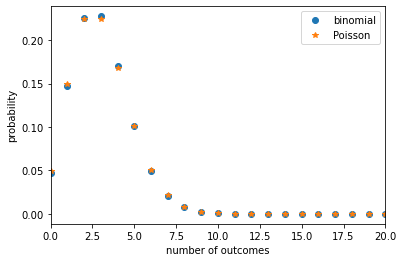

In [ ]:
n = 100
p = 0.03
k = np.arange(0,n+1)
Pb = sps.binom.pmf(k, n, p)
plt.plot(k,Pb, 'o', label='binomial')
Pp = sps.poisson.pmf(k,n*p)

plt.plot(k, Pp, '*', label='Poisson')
plt.xlim([0,20])
plt.xlabel('number of outcomes')
plt.ylabel('probability')
plt.legend();